In [5]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!kaggle datasets download sgus1318/winedata

  0% 0.00/95.9k [00:00<?, ?B/s]
100% 95.9k/95.9k [00:00<00:00, 36.1MB/s]


In [7]:
! unzip winedata.zip

Archive:  winedata.zip
  inflating: winequality_red.csv     
  inflating: winequality_white.csv   


In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('winequality_white.csv')

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [12]:
df['quality'] = df.quality.map({3: 0,4: 1,5: 2,6: 3,7: 4,8: 5,9: 6})

In [13]:
df.quality.value_counts()

3    2198
2    1457
4     880
5     175
1     163
0      20
6       5
Name: quality, dtype: int64

In [14]:
df = df.sample(frac=1).reset_index(drop=True)

In [15]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.22,0.24,11.00,0.041,75.0,167.0,0.99508,2.98,0.56,10.5,3
1,7.4,0.30,0.49,8.20,0.055,49.0,188.0,0.99740,3.52,0.58,9.7,3
2,6.9,0.19,0.38,1.15,0.023,30.0,105.0,0.99047,3.11,0.38,11.4,2
3,7.8,0.28,0.31,2.10,0.046,28.0,208.0,0.99434,3.23,0.64,9.8,2
4,4.8,0.34,0.00,6.50,0.028,33.0,163.0,0.99390,3.36,0.61,9.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.9,0.30,0.21,15.70,0.056,49.0,159.0,0.99827,3.11,0.48,9.0,2
4894,6.3,0.30,0.24,6.60,0.040,38.0,141.0,0.99500,3.22,0.47,9.5,2
4895,7.4,0.27,0.31,2.40,0.014,15.0,143.0,0.99094,3.03,0.65,12.0,1
4896,5.7,0.27,0.16,9.00,0.053,32.0,111.0,0.99474,3.36,0.37,10.4,3


In [16]:
df_train = df.head(3000)
df_test = df.tail(1898)

In [17]:
from sklearn import tree
from sklearn import metrics


In [18]:
train_accuracies = [0.5]
test_accuracies = [0.5]

In [19]:
for depth in range(1,25):
    cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(df_train[cols],df_train.quality)
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'accuracy')

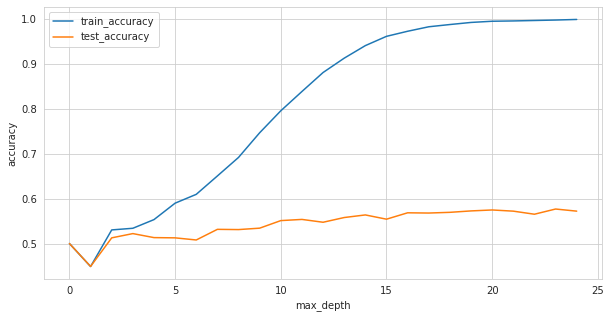

In [21]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_accuracies,label='train_accuracy')
plt.plot(test_accuracies,label='test_accuracy')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('accuracy')

In [22]:
red = pd.read_csv('winequality_red.csv')

In [23]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
from sklearn import model_selection

if __name__ == "__main__":
  df_red = pd.read_csv('winequality_red.csv')
  df['kfold'] = -1
  df_red = df_red.sample(frac=1).reset_index(drop=True)
  kf = model_selection.KFold(n_splits=5)
  for fold,(trn_,val_) in enumerate(kf.split(X=df_red)):
    df_red.loc[val_,'kfold'] = fold
  df_red.to_csv("train_folds.csv",index=False)

In [28]:
df_fold = pd.read_csv('train_folds.csv')

In [30]:
df_fold

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.1,0.39,0.12,2.10,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6,0.0
1,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,7,0.0
2,8.6,0.55,0.09,3.30,0.068,8.0,17.0,0.99735,3.23,0.44,10.0,5,0.0
3,7.9,0.58,0.23,2.30,0.076,23.0,94.0,0.99686,3.21,0.58,9.5,6,0.0
4,6.8,0.57,0.00,2.50,0.072,32.0,64.0,0.99491,3.43,0.56,11.2,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,7.6,0.36,0.31,1.70,0.079,26.0,65.0,0.99716,3.46,0.62,9.5,6,4.0
1595,10.3,0.44,0.50,4.50,0.107,5.0,13.0,0.99800,3.28,0.83,11.5,5,4.0
1596,12.4,0.42,0.49,4.60,0.073,19.0,43.0,0.99780,3.02,0.61,9.5,5,4.0
1597,7.2,0.38,0.31,2.00,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8,4.0


In [61]:
s = df_fold.groupby(by=['kfold']).sum()

In [62]:
s

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
kfold,,,,,,,,,,,,
0.0,2662.0,169.805,90.27,812.65,27.020,5158.0,15123.5,318.95273,1059.71,210.18,3344.933333,1806
1.0,2665.5,167.150,83.64,792.10,28.473,4850.0,14082.0,318.98487,1056.76,211.83,3313.933333,1799
2.0,2662.1,165.775,89.85,806.10,27.888,4949.0,14932.0,318.94461,1060.92,212.71,3356.916667,1830
3.0,2646.8,169.195,84.76,801.65,28.260,5148.0,14870.5,318.96392,1062.20,207.45,3323.200000,1790
4.0,2666.7,172.060,84.77,847.05,28.218,5279.0,15294.0,317.95181,1054.88,210.21,3327.366667,1787


In [73]:
q1 = df_sfold.loc[df_fold['kfold'] == 0]
q2 = df_sfold.loc[df_fold['kfold'] == 1]
q3 = df_sfold.loc[df_fold['kfold'] == 2]
q4 = df_sfold.loc[df_fold['kfold'] == 3]
q5 = df_sfold.loc[df_fold['kfold'] == 5]

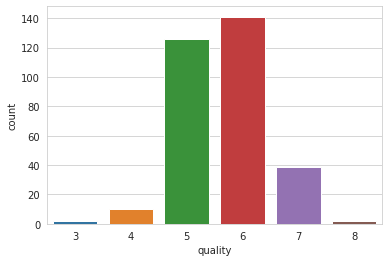

In [74]:
sns.countplot(x=q1['quality'])

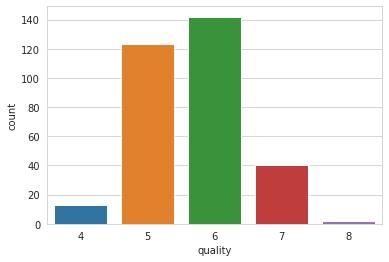

In [75]:
sns.countplot(x=q2['quality'])

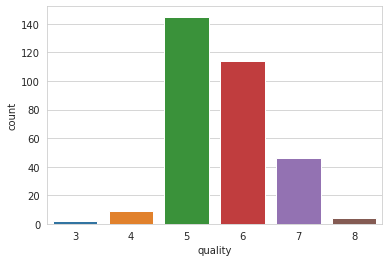

In [76]:
sns.countplot(x=q3['quality'])

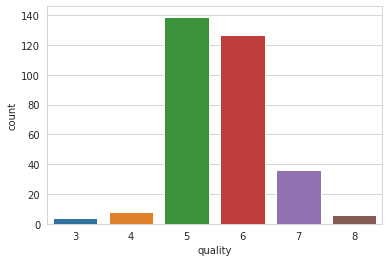

In [77]:
sns.countplot(x=q4['quality'])

In [54]:
from sklearn import model_selection

if __name__ == "__main__":
  df_red = pd.read_csv('winequality_red.csv')
  df['kfold'] = -1
  df_red = df_red.sample(frac=1).reset_index(drop=True)
  kf = model_selection.StratifiedKFold(n_splits=5)
  for fold,(trn_,val_) in enumerate(kf.split(X=df_red,y=df_red['quality'])):
    df_red.loc[val_,'kfold'] = fold
  df_red.to_csv("train_sfolds.csv",index=False)

In [55]:
df_sfold = pd.read_csv('train_sfolds.csv')

In [56]:
df_sfold

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.2,0.700,0.23,2.0,0.099,14.0,81.0,0.99730,3.19,0.70,9.4,5,0.0
1,7.7,0.705,0.10,2.6,0.084,9.0,26.0,0.99760,3.39,0.49,9.7,5,0.0
2,9.0,0.800,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,10.4,6,0.0
3,9.8,0.370,0.39,2.5,0.079,28.0,65.0,0.99729,3.16,0.59,9.8,5,0.0
4,6.6,0.960,0.00,1.8,0.082,5.0,16.0,0.99360,3.50,0.44,11.9,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,8.4,0.665,0.61,2.0,0.112,13.0,95.0,0.99700,3.16,0.54,9.1,5,4.0
1595,7.3,0.550,0.03,1.6,0.072,17.0,42.0,0.99560,3.37,0.48,9.0,4,4.0
1596,8.2,0.440,0.24,2.3,0.063,10.0,28.0,0.99613,3.25,0.53,10.2,6,4.0
1597,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,4.0


In [59]:
st = df_sfold.groupby(by=['kfold']).sum()

In [60]:
st

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
kfold,,,,,,,,,,,,
0.0,2692.1,167.400,88.09,852.45,27.879,5045.5,15205.5,318.99385,1056.85,211.91,3323.116667,1801
1.0,2616.5,173.860,80.83,815.65,27.182,5288.0,15193.0,318.90763,1060.57,210.40,3332.566667,1806
2.0,2653.2,170.000,83.65,799.20,28.433,5003.0,14672.0,318.96528,1062.07,208.82,3327.450000,1806
3.0,2689.4,163.400,91.56,815.50,28.212,5145.5,14648.5,318.99005,1060.62,211.56,3334.183333,1803
4.0,2651.9,169.325,89.16,776.75,28.153,4902.0,14583.0,317.94113,1054.36,209.69,3349.033333,1796


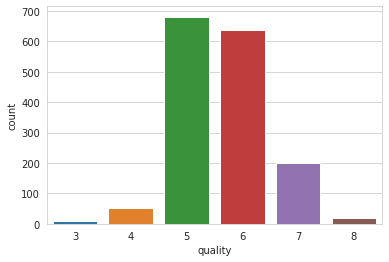

In [66]:
b = sns.countplot(x=df_sfold['quality'])


In [67]:
Q1 = df_sfold.loc[df_sfold['kfold'] == 0]
Q2 = df_sfold.loc[df_sfold['kfold'] == 1]
Q3 = df_sfold.loc[df_sfold['kfold'] == 2]
Q4 = df_sfold.loc[df_sfold['kfold'] == 3]
Q5 = df_sfold.loc[df_sfold['kfold'] == 5]

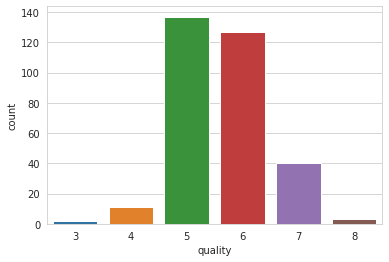

In [68]:
sns.countplot(x=Q1['quality'])

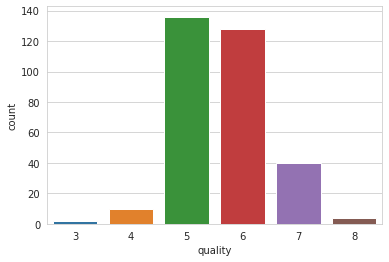

In [69]:
sns.countplot(x=Q2['quality'])

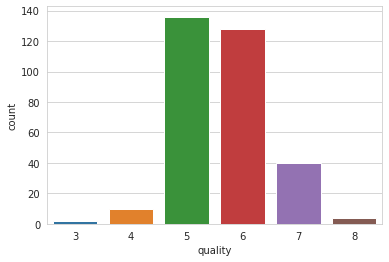

In [70]:
sns.countplot(x=Q3['quality'])

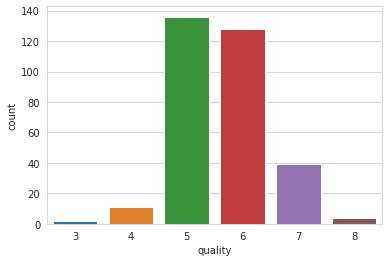

In [71]:
sns.countplot(x=Q4['quality'])

In [104]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection

In [105]:
X, y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)

In [106]:
df = pd.DataFrame(X,columns=[f"f_{i}" for i in range(X.shape[1])])

In [107]:
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99
0,-1.807325,-1.604916,0.823315,-0.968836,0.044504,0.356955,1.557419,-0.279455,0.493585,1.476096,0.260707,-0.673516,0.794739,1.274868,0.646278,-0.796826,0.041388,1.476916,0.613035,1.321622,0.670798,-0.628333,-0.442336,-0.124843,0.340535,-0.502694,-0.166295,-1.010315,1.167912,-0.613620,-0.298297,1.599248,-1.717030,0.533332,0.909135,0.347911,0.328958,0.900724,0.809066,0.095185,...,-1.811036,1.079481,0.290598,-0.921741,0.792268,0.373424,0.251394,0.688613,0.551445,1.357627,1.819194,0.523558,-0.296888,1.422667,-1.107689,0.650910,-0.374441,0.555331,-0.963993,1.611028,0.600301,-0.222912,-0.070623,-0.189201,1.101174,-0.218655,-1.058067,-2.886755,0.954614,-0.199711,-0.862585,0.569157,2.267155,-0.908219,-0.359247,1.670783,-0.576803,-0.574581,1.199502,0.918221
1,0.658933,0.761547,0.316425,0.508894,0.525616,-0.798755,0.443006,2.287278,0.596365,0.455984,-0.724458,1.553774,-0.336757,0.078736,1.492265,0.485380,-1.073908,0.800934,1.191739,-0.051422,-0.233799,-1.529118,0.646607,-0.887576,-1.536121,-0.465590,-0.337137,-1.138596,0.080116,1.557488,0.326573,-0.480466,-0.204082,0.121812,0.409185,-1.218090,0.166750,-0.007307,0.883965,-1.125982,...,-1.468796,-1.045483,-0.254238,1.501054,-0.553991,1.766829,0.060750,-1.490418,-0.271480,1.209548,0.384811,0.937787,-0.015046,0.182498,0.118421,-0.845304,-0.377911,0.592621,-1.015391,-0.574334,0.318025,1.137692,0.821216,-1.210152,1.065216,1.372801,1.026489,1.238788,0.698420,-0.434062,-0.498555,0.220963,0.628625,-1.533643,-0.842953,0.318024,-0.123259,-1.195518,0.978663,1.051689
2,-0.752088,-1.907883,0.383535,-0.609685,1.583338,0.617735,0.117850,-0.478967,0.306347,0.315533,-1.202163,-0.213439,0.620439,-0.516204,-0.594025,-0.178632,0.366155,-1.103778,1.806639,-0.109575,0.393456,1.133346,-0.022595,2.285918,0.586176,0.338968,1.882253,0.281689,-0.300236,0.977983,-0.195370,-0.300084,0.780738,0.614436,-0.277540,-0.702562,0.337059,-0.050885,-0.212470,1.032889,...,-0.254034,0.197620,0.998091,-1.032164,-1.020430,0.515426,0.265289,0.158451,1.785093,1.074365,0.912057,1.177162,0.748057,-0.485487,-1.174040,1.754342,0.902709,0.522653,2.025124,0.172453,0.850531,1.940922,-0.557189,-0.096142,-2.609561,-0.650173,-1.385163,-1.316720,1.276660,-1.386245,-1.632142,0.827393,-0.033622,1.233384,1.106167,-0.534012,-0.312248,-2.709647,0.930172,0.324254
3,-0.962731,1.271702,-0.205997,1.325913,0.181105,-0.173992,0.030010,-0.138073,-0.977599,-0.778180,-0.824957,-0.617283,1.061324,-0.209311,-1.150876,-0.220499,1.128211,0.880777,0.083846,-0.557169,-0.351597,-0.560688,0.567618,-1.046630,-0.770278,0.490204,0.076708,0.566558,1.027435,0.472942,-1.397692,-0.799314,-0.686442,-0.160885,-0.438993,1.086959,-0.952014,0.910714,1.946820,0.070929,...,-1.884485,0.855468,0.941654,1.017380,1.375709,-0.513469,0.930117,0.917193,0.982194,-2.046718,0.936549,0.498626,-0.807360,-0.335496,0.744299,-1.083095,-0.120459,-0.004004,0.461453,-0.904452,2.086798,0.181638,0.737328,0.284320,-1.677609,-1.851465,1.235648,-0.876654,-0.261674,0.168708,0.598444,-0.187799,-2.753260,-2.811991,2.053675,0.496871,0.382813,-0.094597,-0.103549,0.427636
4,0.673782,-0.709820,-2.271129,0.031068,-0.000123,-0.447075,1.215007,-0.144878,-0.373411,-0.214401,0.416055,0.309327,-1.575130,-0.985254,-1.021929,-0.223303,-1.437818,1.475434,0.146596,2.831784,-1.396242,2.795505,0.357773,-0.995756,-0.880024,0.454116,-0.091413,0.577104,-0.616404,-0.665707,0.411793,-1.671925,-0.660436,0.081978,-1.789185,1.155012,-0.187391,-0.782995,-0.403858,0.781085,...,-0.472476,-1.552299,-0.688353,-0.003477,0.323186,-1.631208,0.231741,2.521923,1.335412,1.497694,-0.740320,-0.172633,0.645428,1.018199,1.041102,1.379733,-1.585679,0.5405

In [108]:
df.loc[:, "target"] = y

In [109]:
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target
0,-1.807325,-1.604916,0.823315,-0.968836,0.044504,0.356955,1.557419,-0.279455,0.493585,1.476096,0.260707,-0.673516,0.794739,1.274868,0.646278,-0.796826,0.041388,1.476916,0.613035,1.321622,0.670798,-0.628333,-0.442336,-0.124843,0.340535,-0.502694,-0.166295,-1.010315,1.167912,-0.613620,-0.298297,1.599248,-1.717030,0.533332,0.909135,0.347911,0.328958,0.900724,0.809066,0.095185,...,1.079481,0.290598,-0.921741,0.792268,0.373424,0.251394,0.688613,0.551445,1.357627,1.819194,0.523558,-0.296888,1.422667,-1.107689,0.650910,-0.374441,0.555331,-0.963993,1.611028,0.600301,-0.222912,-0.070623,-0.189201,1.101174,-0.218655,-1.058067,-2.886755,0.954614,-0.199711,-0.862585,0.569157,2.267155,-0.908219,-0.359247,1.670783,-0.576803,-0.574581,1.199502,0.918221,49.129218
1,0.658933,0.761547,0.316425,0.508894,0.525616,-0.798755,0.443006,2.287278,0.596365,0.455984,-0.724458,1.553774,-0.336757,0.078736,1.492265,0.485380,-1.073908,0.800934,1.191739,-0.051422,-0.233799,-1.529118,0.646607,-0.887576,-1.536121,-0.465590,-0.337137,-1.138596,0.080116,1.557488,0.326573,-0.480466,-0.204082,0.121812,0.409185,-1.218090,0.166750,-0.007307,0.883965,-1.125982,...,-1.045483,-0.254238,1.501054,-0.553991,1.766829,0.060750,-1.490418,-0.271480,1.209548,0.384811,0.937787,-0.015046,0.182498,0.118421,-0.845304,-0.377911,0.592621,-1.015391,-0.574334,0.318025,1.137692,0.821216,-1.210152,1.065216,1.372801,1.026489,1.238788,0.698420,-0.434062,-0.498555,0.220963,0.628625,-1.533643,-0.842953,0.318024,-0.123259,-1.195518,0.978663,1.051689,98.710329
2,-0.752088,-1.907883,0.383535,-0.609685,1.583338,0.617735,0.117850,-0.478967,0.306347,0.315533,-1.202163,-0.213439,0.620439,-0.516204,-0.594025,-0.178632,0.366155,-1.103778,1.806639,-0.109575,0.393456,1.133346,-0.022595,2.285918,0.586176,0.338968,1.882253,0.281689,-0.300236,0.977983,-0.195370,-0.300084,0.780738,0.614436,-0.277540,-0.702562,0.337059,-0.050885,-0.212470,1.032889,...,0.197620,0.998091,-1.032164,-1.020430,0.515426,0.265289,0.158451,1.785093,1.074365,0.912057,1.177162,0.748057,-0.485487,-1.174040,1.754342,0.902709,0.522653,2.025124,0.172453,0.850531,1.940922,-0.557189,-0.096142,-2.609561,-0.650173,-1.385163,-1.316720,1.276660,-1.386245,-1.632142,0.827393,-0.033622,1.233384,1.106167,-0.534012,-0.312248,-2.709647,0.930172,0.324254,-125.637661
3,-0.962731,1.271702,-0.205997,1.325913,0.181105,-0.173992,0.030010,-0.138073,-0.977599,-0.778180,-0.824957,-0.617283,1.061324,-0.209311,-1.150876,-0.220499,1.128211,0.880777,0.083846,-0.557169,-0.351597,-0.560688,0.567618,-1.046630,-0.770278,0.490204,0.076708,0.566558,1.027435,0.472942,-1.397692,-0.799314,-0.686442,-0.160885,-0.438993,1.086959,-0.952014,0.910714,1.946820,0.070929,...,0.855468,0.941654,1.017380,1.375709,-0.513469,0.930117,0.917193,0.982194,-2.046718,0.936549,0.498626,-0.807360,-0.335496,0.744299,-1.083095,-0.120459,-0.004004,0.461453,-0.904452,2.086798,0.181638,0.737328,0.284320,-1.677609,-1.851465,1.235648,-0.876654,-0.261674,0.168708,0.598444,-0.187799,-2.753260,-2.811991,2.053675,0.496871,0.382813,-0.094597,-0.103549,0.427636,-87.733364
4,0.673782,-0.709820,-2.271129,0.031068,-0.000123,-0.447075,1.215007,-0.144878,-0.373411,-0.214401,0.416055,0.309327,-1.575130,-0.985254,-1.021929,-0.223303,-1.437818,1.475434,0.146596,2.831784,-1.396242,2.795505,0.357773,-0.995756,-0.880024,0.454116,-0.091413,0.577104,-0.616404,-0.665707,0.411793,-1.671925,-0.660436,0.081978,-1.789185,1.155012,-0.187391,-0.782995,-0.403858,0.781085,...,-1.552299,-0.688353,-0.003477,0.323186,-1.631208,0.231741,2.521923,1.335412,1.497694,-0.740320,-0.172633,0.645428,1.018199,1.041102,1.379733,-1.585679,0.540565,0.

In [110]:
data = df
data["kfold"] = -1

In [111]:
data

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,-1.807325,-1.604916,0.823315,-0.968836,0.044504,0.356955,1.557419,-0.279455,0.493585,1.476096,0.260707,-0.673516,0.794739,1.274868,0.646278,-0.796826,0.041388,1.476916,0.613035,1.321622,0.670798,-0.628333,-0.442336,-0.124843,0.340535,-0.502694,-0.166295,-1.010315,1.167912,-0.613620,-0.298297,1.599248,-1.717030,0.533332,0.909135,0.347911,0.328958,0.900724,0.809066,0.095185,...,0.290598,-0.921741,0.792268,0.373424,0.251394,0.688613,0.551445,1.357627,1.819194,0.523558,-0.296888,1.422667,-1.107689,0.650910,-0.374441,0.555331,-0.963993,1.611028,0.600301,-0.222912,-0.070623,-0.189201,1.101174,-0.218655,-1.058067,-2.886755,0.954614,-0.199711,-0.862585,0.569157,2.267155,-0.908219,-0.359247,1.670783,-0.576803,-0.574581,1.199502,0.918221,49.129218,-1
1,0.658933,0.761547,0.316425,0.508894,0.525616,-0.798755,0.443006,2.287278,0.596365,0.455984,-0.724458,1.553774,-0.336757,0.078736,1.492265,0.485380,-1.073908,0.800934,1.191739,-0.051422,-0.233799,-1.529118,0.646607,-0.887576,-1.536121,-0.465590,-0.337137,-1.138596,0.080116,1.557488,0.326573,-0.480466,-0.204082,0.121812,0.409185,-1.218090,0.166750,-0.007307,0.883965,-1.125982,...,-0.254238,1.501054,-0.553991,1.766829,0.060750,-1.490418,-0.271480,1.209548,0.384811,0.937787,-0.015046,0.182498,0.118421,-0.845304,-0.377911,0.592621,-1.015391,-0.574334,0.318025,1.137692,0.821216,-1.210152,1.065216,1.372801,1.026489,1.238788,0.698420,-0.434062,-0.498555,0.220963,0.628625,-1.533643,-0.842953,0.318024,-0.123259,-1.195518,0.978663,1.051689,98.710329,-1
2,-0.752088,-1.907883,0.383535,-0.609685,1.583338,0.617735,0.117850,-0.478967,0.306347,0.315533,-1.202163,-0.213439,0.620439,-0.516204,-0.594025,-0.178632,0.366155,-1.103778,1.806639,-0.109575,0.393456,1.133346,-0.022595,2.285918,0.586176,0.338968,1.882253,0.281689,-0.300236,0.977983,-0.195370,-0.300084,0.780738,0.614436,-0.277540,-0.702562,0.337059,-0.050885,-0.212470,1.032889,...,0.998091,-1.032164,-1.020430,0.515426,0.265289,0.158451,1.785093,1.074365,0.912057,1.177162,0.748057,-0.485487,-1.174040,1.754342,0.902709,0.522653,2.025124,0.172453,0.850531,1.940922,-0.557189,-0.096142,-2.609561,-0.650173,-1.385163,-1.316720,1.276660,-1.386245,-1.632142,0.827393,-0.033622,1.233384,1.106167,-0.534012,-0.312248,-2.709647,0.930172,0.324254,-125.637661,-1
3,-0.962731,1.271702,-0.205997,1.325913,0.181105,-0.173992,0.030010,-0.138073,-0.977599,-0.778180,-0.824957,-0.617283,1.061324,-0.209311,-1.150876,-0.220499,1.128211,0.880777,0.083846,-0.557169,-0.351597,-0.560688,0.567618,-1.046630,-0.770278,0.490204,0.076708,0.566558,1.027435,0.472942,-1.397692,-0.799314,-0.686442,-0.160885,-0.438993,1.086959,-0.952014,0.910714,1.946820,0.070929,...,0.941654,1.017380,1.375709,-0.513469,0.930117,0.917193,0.982194,-2.046718,0.936549,0.498626,-0.807360,-0.335496,0.744299,-1.083095,-0.120459,-0.004004,0.461453,-0.904452,2.086798,0.181638,0.737328,0.284320,-1.677609,-1.851465,1.235648,-0.876654,-0.261674,0.168708,0.598444,-0.187799,-2.753260,-2.811991,2.053675,0.496871,0.382813,-0.094597,-0.103549,0.427636,-87.733364,-1
4,0.673782,-0.709820,-2.271129,0.031068,-0.000123,-0.447075,1.215007,-0.144878,-0.373411,-0.214401,0.416055,0.309327,-1.575130,-0.985254,-1.021929,-0.223303,-1.437818,1.475434,0.146596,2.831784,-1.396242,2.795505,0.357773,-0.995756,-0.880024,0.454116,-0.091413,0.577104,-0.616404,-0.665707,0.411793,-1.671925,-0.660436,0.081978,-1.789185,1.155012,-0.187391,-0.782995,-0.403858,0.781085,...,-0.688353,-0.003477,0.323186,-1.631208,0.231741,2.521923,1.335412,1.497694,-0.740320,-0.172633,0.645428,1.018199,1.041102,1.379733,-1.585679,0.540565,0.947690,2.836661,1.295653,-1.216271

In [112]:
data = data.sample(frac=1).reset_index(drop=True)

In [113]:
data

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,0.020795,-0.139083,-1.903961,-0.704914,0.358399,-1.011351,0.263156,0.966758,-1.203907,1.599083,0.403329,-1.039006,0.260534,-0.811073,1.059540,-0.189936,-0.285737,0.828586,-0.679987,0.406398,0.681620,-0.044369,0.378576,0.362335,1.634358,0.598916,1.765901,1.779406,-1.433436,0.464179,0.471299,0.657089,-1.042348,0.042246,2.007292,-2.533645,-0.328057,0.159636,0.159520,-1.965768,...,-2.032575,0.056489,1.511021,-0.916938,-0.540249,1.283145,-0.579867,0.954619,-2.059648,-1.141116,-1.720452,0.548065,-0.033827,0.973364,2.292691,0.829104,0.671750,-1.675746,-0.498951,0.153786,0.614998,-0.075629,-0.788335,-0.158769,-0.744334,1.274899,-0.487209,2.200320,1.761810,1.789941,-0.060335,2.956123,0.334837,-0.404768,0.574838,0.686515,0.806311,-1.850549,-56.407743,-1
1,0.680387,1.125029,-0.332274,-1.237132,1.758704,2.022340,-1.104334,-0.017981,0.942959,-0.678478,1.734630,0.408678,-2.430522,0.252336,0.668258,0.949525,2.075946,-0.678503,1.663791,0.709809,-1.027619,0.076811,0.918747,-0.390790,0.752911,-0.387101,0.990515,0.139268,-0.380587,-1.885039,0.577968,-0.044615,-0.156028,0.249526,1.638142,0.306763,1.165106,-1.573934,1.689814,0.308041,...,-0.335741,-0.021028,-0.422156,1.828536,-0.833667,1.296723,0.190437,-0.578128,0.519257,-0.150457,2.215591,-0.932799,0.700161,-0.755452,-1.392952,0.284611,-1.197193,-0.158251,0.080644,-0.951025,-0.783577,0.814137,-0.112745,-2.348060,0.076593,0.711852,-0.969007,0.722349,0.402860,-1.410828,0.816002,1.132286,-1.067434,-1.410209,-0.796154,0.420335,0.223024,1.044946,153.104428,-1
2,1.090772,-0.072280,0.036829,-0.149663,-0.426495,-0.434340,-1.207657,-1.705997,-1.758234,-1.878221,0.368159,1.800664,0.623474,-1.674840,0.694627,-0.074117,1.087129,0.203576,-1.400511,-0.861083,0.113288,-0.781757,-1.106431,1.960424,1.019428,0.293893,-0.329925,1.094879,-0.102227,0.409489,-1.543798,-0.510046,-0.434177,0.248623,0.003003,0.599463,-0.442457,-0.336079,0.930643,-1.358479,...,-0.098440,-1.199922,0.807428,0.075821,-0.626783,1.593241,-1.984374,0.415169,0.139032,0.350292,-0.357738,-0.407588,0.941972,0.618836,-0.665416,0.143188,-0.206273,-0.130584,0.725040,-0.694194,-0.786256,-0.073011,1.005171,-0.112513,0.398208,-1.433000,-0.253789,0.585186,-0.056267,-0.472040,-0.669749,0.115402,-0.827779,-0.877142,-0.565695,2.064452,-0.629055,-0.015457,-11.436863,-1
3,-0.097041,0.995928,0.402763,-0.616480,0.186909,-0.823828,-0.928045,-0.513949,-0.229061,-0.058650,-1.360749,-0.514250,-1.692995,-0.339349,0.641470,0.850353,-0.374720,-1.602155,-0.872351,0.693662,0.225484,-0.406249,1.153959,-1.991983,-0.911638,1.215397,-2.235950,1.030230,0.017270,0.548922,-0.487245,0.686680,-0.004878,-0.302733,0.178021,0.343327,0.319675,-0.230237,-1.321408,0.448295,...,0.347846,0.331550,-0.992446,-2.390405,-1.278159,1.341651,-0.677892,-0.561470,0.482015,-0.110655,1.320235,0.420652,-2.008330,1.754509,1.694970,-1.055414,0.507030,-0.545550,-0.528731,0.416717,0.120840,0.108825,0.070608,0.374109,-0.434633,-1.313420,1.856845,-0.980265,0.548598,-0.226815,0.460435,0.446673,-0.145904,0.087184,-0.688812,0.258403,1.179161,-1.204698,-462.817827,-1
4,1.517853,0.644139,0.174754,-0.486480,-0.287786,2.113408,-0.522632,0.285713,0.924222,-1.230360,-0.116440,0.911825,1.228232,-0.032020,-0.431177,-1.540092,0.626413,-0.606498,-1.265503,-0.542255,0.316701,1.435163,0.189296,1.329510,0.117380,-1.426956,-0.575671,-0.274955,0.268866,0.364224,-0.891473,-0.642330,0.580556,1.419698,-0.394747,-1.068079,1.147836,0.521912,-1.163989,-0.691218,...,1.919091,-0.376429,1.623698,1.123650,-0.265854,0.845716,-0.410579,-0.355700,0.468740,-0.138125,-0.105313,-0.252755,0.386140,0.980485,0.410109,-0.279862,-1.075748,-0.400297,0

In [114]:
num_bins = np.floor(1 + np.log2(len(data)))

In [115]:
num_bins

14.0

In [116]:
data.loc[:, "bins"] = pd.cut(
data["target"], bins=int(num_bins), labels=False
)

In [117]:
data

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold,bins
0,0.020795,-0.139083,-1.903961,-0.704914,0.358399,-1.011351,0.263156,0.966758,-1.203907,1.599083,0.403329,-1.039006,0.260534,-0.811073,1.059540,-0.189936,-0.285737,0.828586,-0.679987,0.406398,0.681620,-0.044369,0.378576,0.362335,1.634358,0.598916,1.765901,1.779406,-1.433436,0.464179,0.471299,0.657089,-1.042348,0.042246,2.007292,-2.533645,-0.328057,0.159636,0.159520,-1.965768,...,0.056489,1.511021,-0.916938,-0.540249,1.283145,-0.579867,0.954619,-2.059648,-1.141116,-1.720452,0.548065,-0.033827,0.973364,2.292691,0.829104,0.671750,-1.675746,-0.498951,0.153786,0.614998,-0.075629,-0.788335,-0.158769,-0.744334,1.274899,-0.487209,2.200320,1.761810,1.789941,-0.060335,2.956123,0.334837,-0.404768,0.574838,0.686515,0.806311,-1.850549,-56.407743,-1,6
1,0.680387,1.125029,-0.332274,-1.237132,1.758704,2.022340,-1.104334,-0.017981,0.942959,-0.678478,1.734630,0.408678,-2.430522,0.252336,0.668258,0.949525,2.075946,-0.678503,1.663791,0.709809,-1.027619,0.076811,0.918747,-0.390790,0.752911,-0.387101,0.990515,0.139268,-0.380587,-1.885039,0.577968,-0.044615,-0.156028,0.249526,1.638142,0.306763,1.165106,-1.573934,1.689814,0.308041,...,-0.021028,-0.422156,1.828536,-0.833667,1.296723,0.190437,-0.578128,0.519257,-0.150457,2.215591,-0.932799,0.700161,-0.755452,-1.392952,0.284611,-1.197193,-0.158251,0.080644,-0.951025,-0.783577,0.814137,-0.112745,-2.348060,0.076593,0.711852,-0.969007,0.722349,0.402860,-1.410828,0.816002,1.132286,-1.067434,-1.410209,-0.796154,0.420335,0.223024,1.044946,153.104428,-1,8
2,1.090772,-0.072280,0.036829,-0.149663,-0.426495,-0.434340,-1.207657,-1.705997,-1.758234,-1.878221,0.368159,1.800664,0.623474,-1.674840,0.694627,-0.074117,1.087129,0.203576,-1.400511,-0.861083,0.113288,-0.781757,-1.106431,1.960424,1.019428,0.293893,-0.329925,1.094879,-0.102227,0.409489,-1.543798,-0.510046,-0.434177,0.248623,0.003003,0.599463,-0.442457,-0.336079,0.930643,-1.358479,...,-1.199922,0.807428,0.075821,-0.626783,1.593241,-1.984374,0.415169,0.139032,0.350292,-0.357738,-0.407588,0.941972,0.618836,-0.665416,0.143188,-0.206273,-0.130584,0.725040,-0.694194,-0.786256,-0.073011,1.005171,-0.112513,0.398208,-1.433000,-0.253789,0.585186,-0.056267,-0.472040,-0.669749,0.115402,-0.827779,-0.877142,-0.565695,2.064452,-0.629055,-0.015457,-11.436863,-1,7
3,-0.097041,0.995928,0.402763,-0.616480,0.186909,-0.823828,-0.928045,-0.513949,-0.229061,-0.058650,-1.360749,-0.514250,-1.692995,-0.339349,0.641470,0.850353,-0.374720,-1.602155,-0.872351,0.693662,0.225484,-0.406249,1.153959,-1.991983,-0.911638,1.215397,-2.235950,1.030230,0.017270,0.548922,-0.487245,0.686680,-0.004878,-0.302733,0.178021,0.343327,0.319675,-0.230237,-1.321408,0.448295,...,0.331550,-0.992446,-2.390405,-1.278159,1.341651,-0.677892,-0.561470,0.482015,-0.110655,1.320235,0.420652,-2.008330,1.754509,1.694970,-1.055414,0.507030,-0.545550,-0.528731,0.416717,0.120840,0.108825,0.070608,0.374109,-0.434633,-1.313420,1.856845,-0.980265,0.548598,-0.226815,0.460435,0.446673,-0.145904,0.087184,-0.688812,0.258403,1.179161,-1.204698,-462.817827,-1,2
4,1.517853,0.644139,0.174754,-0.486480,-0.287786,2.113408,-0.522632,0.285713,0.924222,-1.230360,-0.116440,0.911825,1.228232,-0.032020,-0.431177,-1.540092,0.626413,-0.606498,-1.265503,-0.542255,0.316701,1.435163,0.189296,1.329510,0.117380,-1.426956,-0.575671,-0.274955,0.268866,0.364224,-0.891473,-0.642330,0.580556,1.419698,-0.394747,-1.068079,1.147836,0.521912,-1.163989,-0.691218,...,-0.376429,1.623698,1.123650,-0.265854,0.845716,-0.410579,-0.355700,0.468740,-0.138125,-0.105313,-0.252755,0.386140,0.980485,0.410109,-0.279862,-1.075748,-0.400297,0.121182,0.193490,-1.363808,1.692978,-0.1

In [118]:
kf = model_selection.StratifiedKFold(n_splits=5)

In [119]:
kf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [120]:
for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
  data.loc[v_, 'kfold'] = f

In [121]:
data

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold,bins
0,0.020795,-0.139083,-1.903961,-0.704914,0.358399,-1.011351,0.263156,0.966758,-1.203907,1.599083,0.403329,-1.039006,0.260534,-0.811073,1.059540,-0.189936,-0.285737,0.828586,-0.679987,0.406398,0.681620,-0.044369,0.378576,0.362335,1.634358,0.598916,1.765901,1.779406,-1.433436,0.464179,0.471299,0.657089,-1.042348,0.042246,2.007292,-2.533645,-0.328057,0.159636,0.159520,-1.965768,...,0.056489,1.511021,-0.916938,-0.540249,1.283145,-0.579867,0.954619,-2.059648,-1.141116,-1.720452,0.548065,-0.033827,0.973364,2.292691,0.829104,0.671750,-1.675746,-0.498951,0.153786,0.614998,-0.075629,-0.788335,-0.158769,-0.744334,1.274899,-0.487209,2.200320,1.761810,1.789941,-0.060335,2.956123,0.334837,-0.404768,0.574838,0.686515,0.806311,-1.850549,-56.407743,0,6
1,0.680387,1.125029,-0.332274,-1.237132,1.758704,2.022340,-1.104334,-0.017981,0.942959,-0.678478,1.734630,0.408678,-2.430522,0.252336,0.668258,0.949525,2.075946,-0.678503,1.663791,0.709809,-1.027619,0.076811,0.918747,-0.390790,0.752911,-0.387101,0.990515,0.139268,-0.380587,-1.885039,0.577968,-0.044615,-0.156028,0.249526,1.638142,0.306763,1.165106,-1.573934,1.689814,0.308041,...,-0.021028,-0.422156,1.828536,-0.833667,1.296723,0.190437,-0.578128,0.519257,-0.150457,2.215591,-0.932799,0.700161,-0.755452,-1.392952,0.284611,-1.197193,-0.158251,0.080644,-0.951025,-0.783577,0.814137,-0.112745,-2.348060,0.076593,0.711852,-0.969007,0.722349,0.402860,-1.410828,0.816002,1.132286,-1.067434,-1.410209,-0.796154,0.420335,0.223024,1.044946,153.104428,0,8
2,1.090772,-0.072280,0.036829,-0.149663,-0.426495,-0.434340,-1.207657,-1.705997,-1.758234,-1.878221,0.368159,1.800664,0.623474,-1.674840,0.694627,-0.074117,1.087129,0.203576,-1.400511,-0.861083,0.113288,-0.781757,-1.106431,1.960424,1.019428,0.293893,-0.329925,1.094879,-0.102227,0.409489,-1.543798,-0.510046,-0.434177,0.248623,0.003003,0.599463,-0.442457,-0.336079,0.930643,-1.358479,...,-1.199922,0.807428,0.075821,-0.626783,1.593241,-1.984374,0.415169,0.139032,0.350292,-0.357738,-0.407588,0.941972,0.618836,-0.665416,0.143188,-0.206273,-0.130584,0.725040,-0.694194,-0.786256,-0.073011,1.005171,-0.112513,0.398208,-1.433000,-0.253789,0.585186,-0.056267,-0.472040,-0.669749,0.115402,-0.827779,-0.877142,-0.565695,2.064452,-0.629055,-0.015457,-11.436863,0,7
3,-0.097041,0.995928,0.402763,-0.616480,0.186909,-0.823828,-0.928045,-0.513949,-0.229061,-0.058650,-1.360749,-0.514250,-1.692995,-0.339349,0.641470,0.850353,-0.374720,-1.602155,-0.872351,0.693662,0.225484,-0.406249,1.153959,-1.991983,-0.911638,1.215397,-2.235950,1.030230,0.017270,0.548922,-0.487245,0.686680,-0.004878,-0.302733,0.178021,0.343327,0.319675,-0.230237,-1.321408,0.448295,...,0.331550,-0.992446,-2.390405,-1.278159,1.341651,-0.677892,-0.561470,0.482015,-0.110655,1.320235,0.420652,-2.008330,1.754509,1.694970,-1.055414,0.507030,-0.545550,-0.528731,0.416717,0.120840,0.108825,0.070608,0.374109,-0.434633,-1.313420,1.856845,-0.980265,0.548598,-0.226815,0.460435,0.446673,-0.145904,0.087184,-0.688812,0.258403,1.179161,-1.204698,-462.817827,0,2
4,1.517853,0.644139,0.174754,-0.486480,-0.287786,2.113408,-0.522632,0.285713,0.924222,-1.230360,-0.116440,0.911825,1.228232,-0.032020,-0.431177,-1.540092,0.626413,-0.606498,-1.265503,-0.542255,0.316701,1.435163,0.189296,1.329510,0.117380,-1.426956,-0.575671,-0.274955,0.268866,0.364224,-0.891473,-0.642330,0.580556,1.419698,-0.394747,-1.068079,1.147836,0.521912,-1.163989,-0.691218,...,-0.376429,1.623698,1.123650,-0.265854,0.845716,-0.410579,-0.355700,0.468740,-0.138125,-0.105313,-0.252755,0.386140,0.980485,0.410109,-0.279862,-1.075748,-0.400297,0.121182,0.193490,-1.363808,1.692978,-0.13986

In [126]:
B1 = data.loc[data['kfold'] == 0]
B2 = data.loc[data['kfold'] == 1]

In [125]:
B1.bins.value_counts()

7     608
6     587
8     502
5     415
9     316
4     233
10    140
3      96
11     49
2      29
12     15
1       7
13      2
0       1
Name: bins, dtype: int64

In [127]:
B2.bins.value_counts()

7     608
6     587
8     501
5     416
9     315
4     233
10    140
3      96
11     49
2      30
12     15
1       7
13      2
0       1
Name: bins, dtype: int64